In [ ]:
import numpy as np
import pandas as pd

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/emmarex/plantdisease"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: achintahazra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease


100%|██████████| 658M/658M [00:03<00:00, 203MB/s] 


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/plantdisease/PlantVillage'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


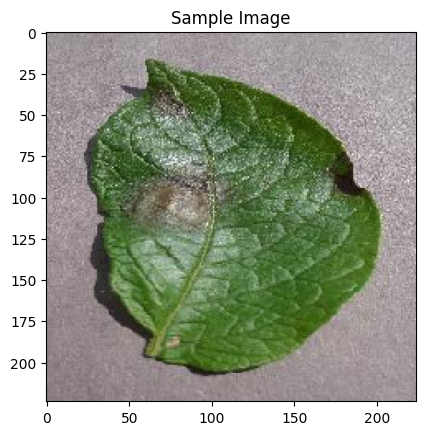

In [ ]:
images, labels = next(train_gen)
import matplotlib.pyplot as plt
plt.imshow(images[5])
plt.title("Sample Image")
plt.show()

In [ ]:
# View total number of images and classes
print("Training samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)
print("Number of classes:", train_gen.num_classes)

Training samples: 16516
Validation samples: 4122
Number of classes: 15


In [ ]:
# View class labels and their numeric mapping
print(train_gen.class_indices)

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


In [ ]:
# Image distribution per class lebel

import numpy as np
from collections import Counter

counts = Counter(train_gen.classes)
for k, v in sorted(counts.items()):
    print(list(train_gen.class_indices.keys())[k], ":", v)


Pepper__bell___Bacterial_spot : 798
Pepper__bell___healthy : 1183
Potato___Early_blight : 800
Potato___Late_blight : 800
Potato___healthy : 122
Tomato_Bacterial_spot : 1702
Tomato_Early_blight : 800
Tomato_Late_blight : 1528
Tomato_Leaf_Mold : 762
Tomato_Septoria_leaf_spot : 1417
Tomato_Spider_mites_Two_spotted_spider_mite : 1341
Tomato__Target_Spot : 1124
Tomato__Tomato_YellowLeaf__Curl_Virus : 2567
Tomato__Tomato_mosaic_virus : 299
Tomato_healthy : 1273


**Baseline Model**<br>
• Load pretrained model (ResNet50/MobileNetV2/EfficientNet)<br>
• Remove original classification head<br>
• Add custom classification layers for 38 classes<br>
• Freeze base model layers initially

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
#weights='imagenet': loads pretrained weights from ImageNet.
# include_top=False: removes the old classification layers.

# Freeze base model layers initially
for layer in base_model.layers:
    layer.trainable = False
# trainable=False: ensures we only train the new layers initially.

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,                          # pretrained CNN backbone
    GlobalAveragePooling2D(),            # converts feature maps to 1D vector
    Dense(256, activation='relu'),       # custom fully connected layer
    Dropout(0.5),                        # regularization
    Dense(train_gen.num_classes, activation='softmax')  # final output
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Fiting The Base model <br>
epochs=10 means 10 time visit of the whole dataset

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.1598 - loss: 2.5670 - val_accuracy: 0.1936 - val_loss: 2.3326
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 107ms/step - accuracy: 0.1972 - loss: 2.3581 - val_accuracy: 0.2635 - val_loss: 2.2301
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.2329 - loss: 2.2805 - val_accuracy: 0.2669 - val_loss: 2.1571
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 57s 111ms/step - accuracy: 0.2631 - loss: 2.1980 - val_accuracy: 0.3673 - val_loss: 2.0558
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - accuracy: 0.2707 - loss: 2.1485 - val_accuracy: 0.3913 - val_loss: 1.9732
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - accuracy: 0.2970 - loss: 2.0754 - val_accuracy: 0.3940 - val_loss: 1.9386
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 55s 106ms/step - accuracy: 0.3033 - loss: 2.0454 - val_accuracy: 0.4204 - val_loss: 1.8786
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.3261 - loss: 2.0039 - val

**Check training performance**<br>
Accuracy and Loss

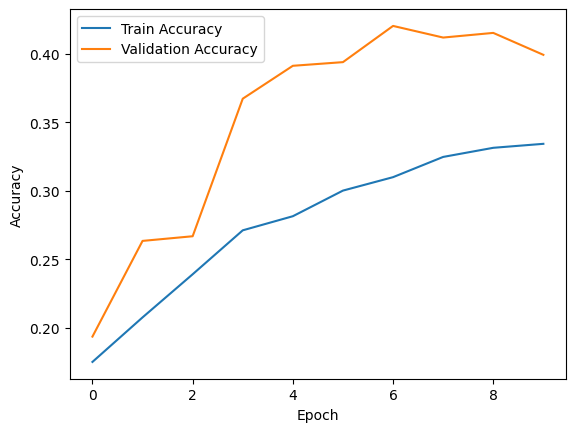

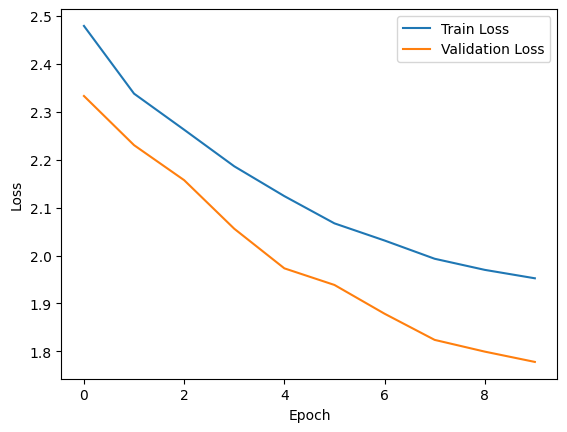

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
model.save(os.path.join('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN', 'plant_disease_model.h5'))

In [ ]:
from tensorflow.keras.models import load_model
base_model = load_model('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/plant_disease_model.h5')

**Phase 1 — Feature Extraction (Train top layers only)**

In [ ]:
# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
base_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Add useful callbacks : These automatically stop training early or save the best model.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/plant_disease_model.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

In [ ]:
# Train the model
history = base_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3305 - loss: 1.9373

517/517 ━━━━━━━━━━━━━━━━━━━━ 71s 125ms/step - accuracy: 0.3305 - loss: 1.9373 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 0.0010
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3396 - loss: 1.9332

517/517 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - accuracy: 0.3396 - loss: 1.9332 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 0.0010
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 107ms/step - accuracy: 0.3395 - loss: 1.9348 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 0.0010
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 57s 110ms/step - accuracy: 0.3353 - loss: 1.9349 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 0.0010
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 66s 127ms/step - accuracy: 0.3336 - loss: 1.9347 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 2.0000e-04
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3342 - loss: 1.9354

517/517 ━━━━━━━━━━━━━━━━━━━━ 59s 114ms/step - accuracy: 0.3342 - loss: 1.9354 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 2.0000e-04
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.3354 - loss: 1.9234 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 2.0000e-04
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 107ms/step - accuracy: 0.3353 - loss: 1.9353 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 4.0000e-05
Epoch 9/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - accuracy: 0.3412 - loss: 1.9392 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 4.0000e-05
Epoch 10/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 56s 109ms/step - accuracy: 0.3373 - loss: 1.9356 - val_accuracy: 0.3993 - val_loss: 1.7781 - learning_rate: 4.0000e-05


In [ ]:
base_model.save('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/plant_disease_model_feature_extraction.h5')

**Phase 2 — Fine-Tuning (Unfreeze some base layers)**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/plant_disease_model_feature_extraction.h5')

In [ ]:
# Unfreeze last few convolutional layers
for layer in model.layers[-20:]:
    layer.trainable = True

In [ ]:
# Recompile with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Continue training
history_phase2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.1793 - loss: 24.3578

517/517 ━━━━━━━━━━━━━━━━━━━━ 265s 386ms/step - accuracy: 0.1795 - loss: 24.3276 - val_accuracy: 0.0752 - val_loss: 133.7821 - learning_rate: 1.0000e-05
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.4758 - loss: 1.6529

517/517 ━━━━━━━━━━━━━━━━━━━━ 167s 323ms/step - accuracy: 0.4759 - loss: 1.6527 - val_accuracy: 0.3258 - val_loss: 2.4888 - learning_rate: 1.0000e-05
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.6199 - loss: 1.2150

517/517 ━━━━━━━━━━━━━━━━━━━━ 168s 324ms/step - accuracy: 0.6199 - loss: 1.2148 - val_accuracy: 0.8278 - val_loss: 0.6455 - learning_rate: 1.0000e-05
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.7596 - loss: 0.7975

517/517 ━━━━━━━━━━━━━━━━━━━━ 169s 327ms/step - accuracy: 0.7596 - loss: 0.7973 - val_accuracy: 0.8891 - val_loss: 0.3844 - learning_rate: 1.0000e-05
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8517 - loss: 0.4957

517/517 ━━━━━━━━━━━━━━━━━━━━ 168s 325ms/step - accuracy: 0.8517 - loss: 0.4956 - val_accuracy: 0.9260 - val_loss: 0.2385 - learning_rate: 1.0000e-05
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9091 - loss: 0.3046

517/517 ━━━━━━━━━━━━━━━━━━━━ 166s 320ms/step - accuracy: 0.9091 - loss: 0.3046 - val_accuracy: 0.9483 - val_loss: 0.1653 - learning_rate: 1.0000e-05
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9408 - loss: 0.2109

517/517 ━━━━━━━━━━━━━━━━━━━━ 166s 321ms/step - accuracy: 0.9408 - loss: 0.2108 - val_accuracy: 0.9646 - val_loss: 0.1125 - learning_rate: 1.0000e-05
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9611 - loss: 0.1412

517/517 ━━━━━━━━━━━━━━━━━━━━ 168s 325ms/step - accuracy: 0.9611 - loss: 0.1411 - val_accuracy: 0.9738 - val_loss: 0.0858 - learning_rate: 1.0000e-05
Epoch 9/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9743 - loss: 0.0950

517/517 ━━━━━━━━━━━━━━━━━━━━ 169s 326ms/step - accuracy: 0.9743 - loss: 0.0949 - val_accuracy: 0.9757 - val_loss: 0.0805 - learning_rate: 1.0000e-05
Epoch 10/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9792 - loss: 0.0777

517/517 ━━━━━━━━━━━━━━━━━━━━ 168s 325ms/step - accuracy: 0.9792 - loss: 0.0777 - val_accuracy: 0.9748 - val_loss: 0.0780 - learning_rate: 1.0000e-05


In [ ]:
model.save('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/plant_disease_model_finetuned.h5')

**Final Model Evaluation and Prediction**

In [2]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/plant_disease_model_finetuned.h5')

In [8]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on test set
test_loss, test_acc = model.evaluate(val_gen)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict for detailed analysis
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=val_gen.class_indices.keys()))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.9794 - loss: 0.0633
Test Accuracy: 0.9748
Test Loss: 0.0780
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.06      0.06      0.06       199
                     Pepper__bell___healthy       0.08      0.08      0.08       295
                      Potato___Early_blight       0.06      0.06      0.06       200
                       Potato___Late_blight       0.06      0.06      0.06       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.11      0.11      0.11       425
                        Tomato_Early_blight       0.04      0.04      0.04       200
                         Tomato_Late_blight       0.09      0.10      0.10       381
                           Tomato_Leaf_Mold       0.02      0.02      0.

In [10]:
# Training on real images
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/Othercomputers/PC - 15/Deep Learning/1.AI-Powered Plant Disease Detector using CNN/images.jpg'  # Your custom image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = np.argmax(pred)
pred_name = list(train_gen.class_indices.keys())[pred_class]

print("Predicted Disease:", pred_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Disease: Potato___Early_blight
